# Modeling and Simulation in Python
Chapter 5 World Population

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

## Reading Data
Pandas is a library that provides tools for reading and processing data. `read_html` reads a web page from a file or the Internet and creates one `DataFrame` for each table on the page.

In [2]:
from pandas import read_html

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/Estimates_of_historical_world_population

The arguments of `read_html` specify the file to read and how to interpret the tables in the file.<br>The result, `tables`, is a sequence of `DataFrame` objects; `len(tables)` reports the length of the sequence. (Note: `tables` is a sequence that contains one DataFrame for each table. A DataFrame is an object, defined by Pandas, that represents tabular data).

The arguments to `read_html` are filename, header (set to 0), index_col (set to 0), decimal='M' (set to this because we want to treat M as a decimal point (which allows some of the estimates, which are expressed in millions, to be read as numbers). Normally this argument is used to indicate which character should be considered a decimal point, because some conventions use a period and some use a comma.

In [3]:
filename='data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')
len(tables)

6

The web page had 6 tables! So, `tables` is a sequence that contains one DataFrame for each table and we need data from the third table so need to index `table` to get `tables[2]` - remember index starts at 0.

We can select the `DataFrame` we want using the bracket operator.  The tables are numbered from 0, so `tables[2]` is actually the third table on the page.

`head` selects the header and the first five rows.

In [4]:
table2 = tables[2]
table2.head()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


`tail` selects the last five rows.

In [5]:
table2.tail()

,United States Census Bureau (2017)[28],Population Reference Bureau (1973–2016)[15],United Nations Department of Economic and Social Affairs (2015)[16],Maddison (2008)[17],HYDE (2007)[24],Tanton (1994)[18],Biraben (1980)[19],McEvedy & Jones (1978)[20],Thomlinson (1975)[21],Durand (1974)[22],Clark (1967)[23]
Year,,,,,,,,,,,
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,7247892788,7.336435e+09,7.349472e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,7325996709,7.418152e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Long column names are awkard to work with, but we can replace them with abbreviated names.

In [6]:
table2.columns=['census', 'prb', 'un', 'maddison', 
                'hyde', 'tanton', 'biraben', 'mj', 
                'thomlinson', 'durand', 'clark']

Here is how the DataFrame looks now (with abbreviated column names)

In [7]:
table2.head()

,census,prb,un,maddison,hyde,tanton,biraben,mj,thomlinson,durand,clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column, which is labeled `Year`, is special.  It is the **index** for this `DataFrame`, which means it contains the labels for the rows.

Some of the values use scientific notation; for example, `2.544000e+09` is shorthand for $2.544 \cdot 10^9$ or 2.544 billion.

`NaN` is a special value that indicates missing data.

### Series

We can use dot notation to select a column from a `DataFrame`.  The result is a `Series`, which is like a `DataFrame` with a single column.

In [8]:
census = table2.census
census.head()

Year
1950    2557628654
1951    2594939877
1952    2636772306
1953    2682053389
1954    2730228104
Name: census, dtype: int64

In [9]:
census.tail()

Year
2012    7013871313
2013    7092128094
2014    7169968185
2015    7247892788
2016    7325996709
Name: census, dtype: int64

Like a `DataFrame`, a `Series` contains an index, which labels the rows.

`1e9` is scientific notation for $1 \cdot 10^9$ or 1 billion.

From here on, we will work in units of billions.

In [10]:
un = table2.un / 1e9
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: un, dtype: float64

In [11]:
census = table2.census / 1e9
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: census, dtype: float64

Let us see the plots for these two now

Saving figure to file chap05-fig01.pdf


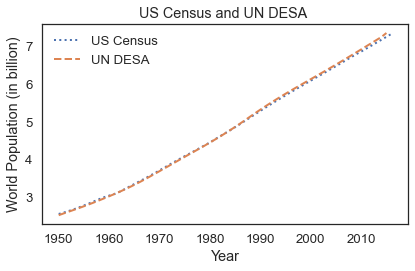

In [12]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
#try changing the ':' to 'bo' means marker is blue circle - and change '--' to 'r+' means red plus sign
decorate(title = 'US Census and UN DESA ',
        xlabel = 'Year',
        ylabel = 'World Population (in billion)')

savefig('chap05-fig01.pdf')

The following expression computes the elementwise differences between the two series (census and un), then divides through by the UN value to produce [relative errors](https://en.wikipedia.org/wiki/Approximation_error), then finds the largest element.

`max` and `abs` are built-in functions provided by Python, but NumPy also provides version that are a little more general.  When you import `modsim`, you get the NumPy versions of these functions.

The largest relative error between the estimates is about 1.38%.

In [13]:
max(abs(census-un)/un)*100

1.3821293828998855

### Constant Growth Model
Suppose we want to predict world population growth over the next 50 or 100 years.
Develop model that describes how populations grow, fit  model to  data we have so far, and then use model to generate predictions. Let us first look at a linear model.

We can select a value from a `Series` using bracket notation.  Here are first and last elements:

In [14]:
census[1950]

2.557628654

In [15]:
census [2016]

7.325996709

But rather than "hard code" those dates, we can get the first and last labels (using get_first_label  and get_first_value (*both in `modsim.py`*) for first and similarly for last) from the `Series`:

In [16]:
#get_first_label gives index of first
t_0 = get_first_label(census)

1950

In [17]:
t_end = get_last_label(census)

2016

In [18]:
#get the elapsed time as the difference of the two times above
elapsed_time = t_end - t_0

66

In [19]:
#get_first_value gives value of first
p_0 = get_first_value(census)

2.557628654

In [20]:
p_end = get_last_value(census)

7.325996709

Then we can compute the average annual growth in billions of people per year.

In [21]:
total_growth = p_end - p_0

4.768368055

In [22]:
annual_growth = total_growth/elapsed_time

0.07224800083333333

## Simulation
The next step is to use this estimate to simulate population growth since 1950.

### TimeSeries
Now let us create a `TimeSeries` to contain values generated by linear growth model. `TimeSeries` (object provided by ModSim library) contains a sequence of time stamps and a corresponding sequence of values.

In [23]:
results=TimeSeries()

,values


Initially the `TimeSeries` is empty, but we can initialize it so the starting value, in 1950, is the 1950 population estimated by the US Census.

In [24]:
results[t_0] = census[t_0]
results

,values
1950,2.557629


After that, the population in the model grows by a constant amount each year.

In [25]:
help(linrange)

Help on function linrange in module modsim.modsim:

linrange(start=0, stop=None, step=1, endpoint=False, **options)
    Returns an array of evenly-spaced values in an interval.
    
    By default, the last value in the array is `stop-step`
    (at least approximately).
    If you provide the keyword argument `endpoint=True`,
    the last value in the array is `stop`.
    
    This function works best if the space between start and stop
    is divisible by step; otherwise the results might be surprising.
    
    start: first value
    stop: last value
    step: space between values
    
    returns: NumPy array



In [26]:
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

In [27]:
results.head()

1950    2.557629
1951    2.629877
1952    2.702125
1953    2.774373
1954    2.846621
dtype: float64

In [28]:
results.tail()

2012    7.037005
2013    7.109253
2014    7.181501
2015    7.253749
2016    7.325997
dtype: float64

Let us plot this model along with the other two

Saving figure to file chap05-fig02.pdf


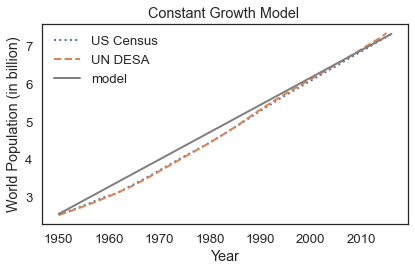

In [29]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')
decorate(title = 'Constant Growth Model ',
        xlabel = 'Year',
        ylabel = 'World Population (in billion)')

savefig('chap05-fig02.pdf')

The model fits the data pretty well after 1990, but not so well before.

### Exercises

Try fitting the model using **data from 1970 to the present**, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change. Start with `t_0_new` as 1970. Compute `annual_growth_new` based on `total_growth_new` and `elapsed_time_new`.

2. Make sure your `TimeSeries` starts in 1950, **even though the estimated annual growth is based on later data**. Call this `results_new`

3. Run the simulation for 1950 to 2016, plot the three graphs (census, un and results_new), and print the error percentage.

4. Try to add a constant to the starting value results_new[t_0] to match the data better and run the simulation again. Can you get a lower error? 

In [32]:
t_0_new = 1970
t_end_new = get_last_label(census)
elapsed_time_new = t_end_new - t_0_new

p_0_new = census[t_0_new]
p_end_new = get_last_value(census)
total_growth_new = p_end_new - p_0_new

annual_growth_new = total_growth_new/elapsed_time_new

0.07854997754347826

In [33]:
results_new = TimeSeries()
results_new[t_0] = census[t_0]
results_new

,values
1950,2.557629


In [34]:
for t in linrange(t_0, t_end):
    results_new[t+1] = results_new[t] + annual_growth_new

Saving figure to file chap05-fig02.pdf


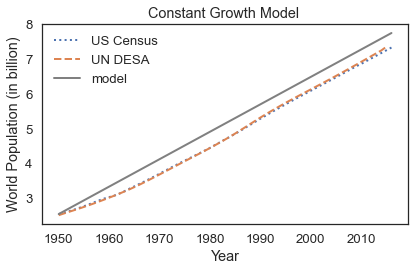

In [35]:
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results_new, color='gray', label='model')
decorate(title = 'Constant Growth Model ',
        xlabel = 'Year',
        ylabel = 'World Population (in billion)')

savefig('chap05-fig02.pdf')